# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ELANG SATRIA PUTRA BUANA
- **Email:** elangspb16@gmail.com
- **ID Dicoding:** elangspb

## Menentukan Pertanyaan Bisnis

- Apa faktor yang mempengaruhi dalam peminjaman sepeda ?
- Cara meningkatkan efisiensi pengelolaan peminjaman agar bisa menghadapi permintaan pada hari kerja ?
- Berapa jumlah sepeda yang disewa (perjam) selama hari libur tahun 2012

## Import Semua Packages/Library yang Digunakan

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

#### Day

In [42]:
day = pd.read_csv('./data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Hour

In [43]:
hour = pd.read_csv('./data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Day

In [44]:
day.info()

# seharusnya 'dteday' bertipe datetime bukan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [46]:
print("duplikat: ", day.duplicated().sum())

duplikat:  0


#### Hour

In [47]:
hour.info()

# seharusnya 'dteday' bertipe datetime bukan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
print("duplikat: ", hour.duplicated().sum())

duplikat:  0


Data yang kita gunakan ini cukup bagus karena tidak ada yang duplikat dan missing value, hanya saja terdapat ketidaksesuaian tipe data pada kolom `dteday` yang dimana kolom tersebut harusnya bertipe data `datetime` bukan `object`

### Cleaning Data (Perubahan Tipe Data)

#### Day

In [50]:
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Hour

In [51]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Day

In [52]:
day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


1. Dataset mencakup rentang waktu selama 2 tahun, dari 1 Januari 2011 hingga 31 Desember 2012, dengan total 731 hari yang diteliti.
2. Jumlah rata-rata peminjaman total (`cnt`) adalah sekitar 4504,35, dengan nilai minimum 22 dan maksimum 8714.
3. Dataset mencakup empat musim, dengan musim paling umum adalah Musim Gugur (`musim 3`), dengan nilai rata-rata musim sekitar 2,5.
4. Musim direpresentasikan oleh nilai numerik (1, 2, 3, 4) [season (1:`springer`, 2:`summer`, 3:`fall`, 4:`winter`)].
5. Distribusi hari kerja (`workingday`) memiliki rata-rata, sekitar 68% hari adalah hari kerja.
6. Ada dua jenis pengguna peminjaman: casual dan terdaftar. Jumlah rata-rata untuk pengguna casual dan terdaftar adalah 848,18 dan 3656,17, secara berturut-turut.

#### Cek kolom yang memiliki tipe data 'categorical'

In [53]:
categorical = day.iloc[:,[2,3,4,5,6,7,8,15]]
categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600
...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,2114
727,1,1,12,0,5,1,2,3095
728,1,1,12,0,6,0,2,1341
729,1,1,12,0,0,0,1,1796


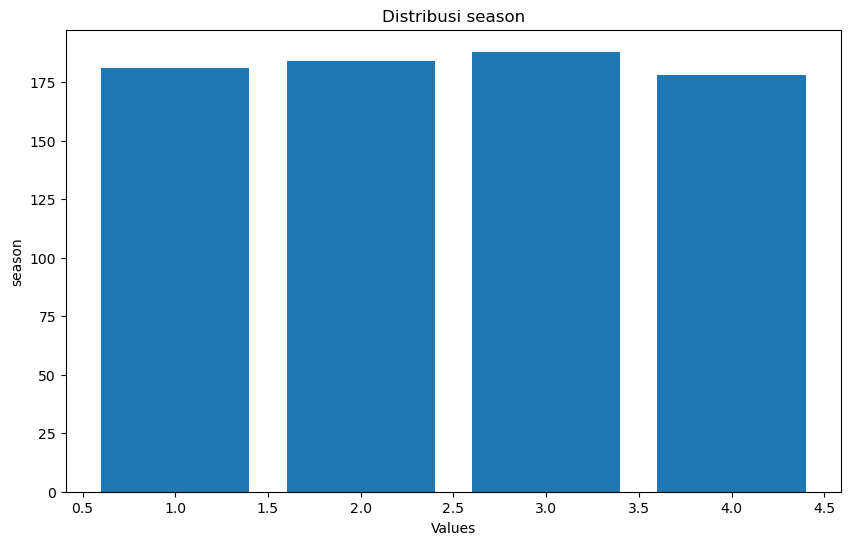

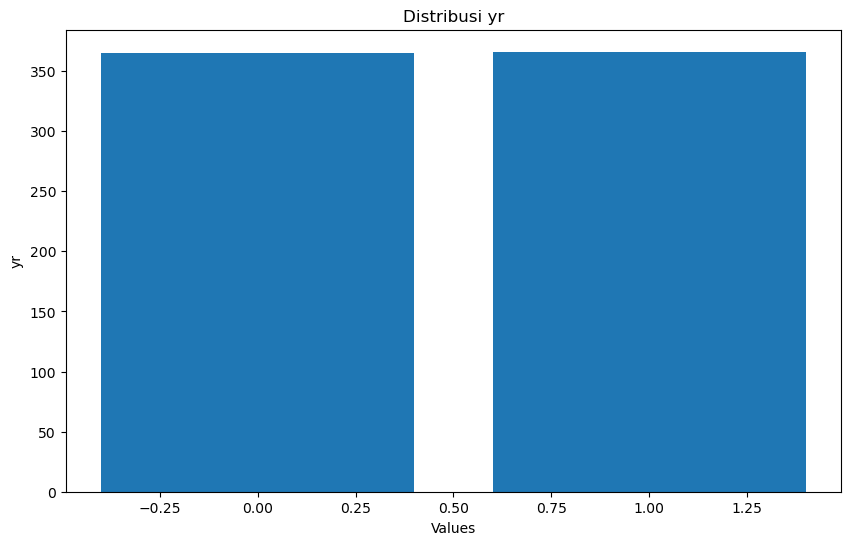

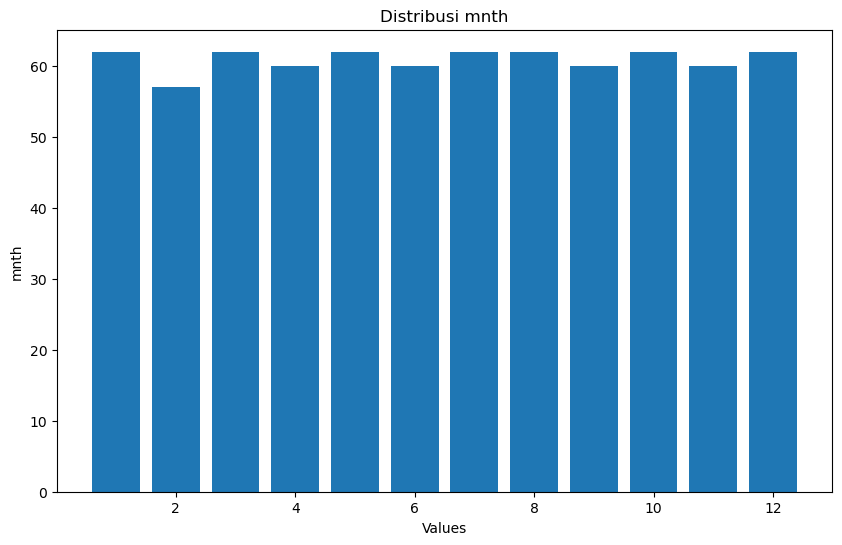

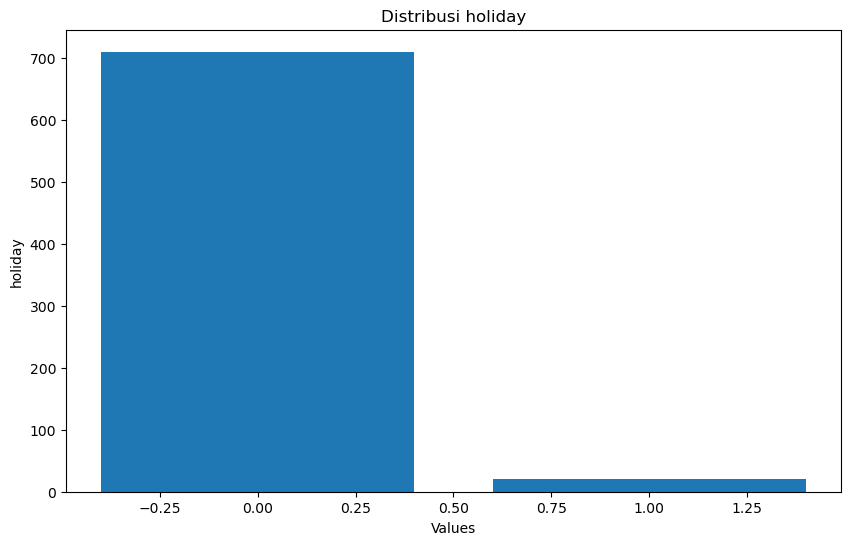

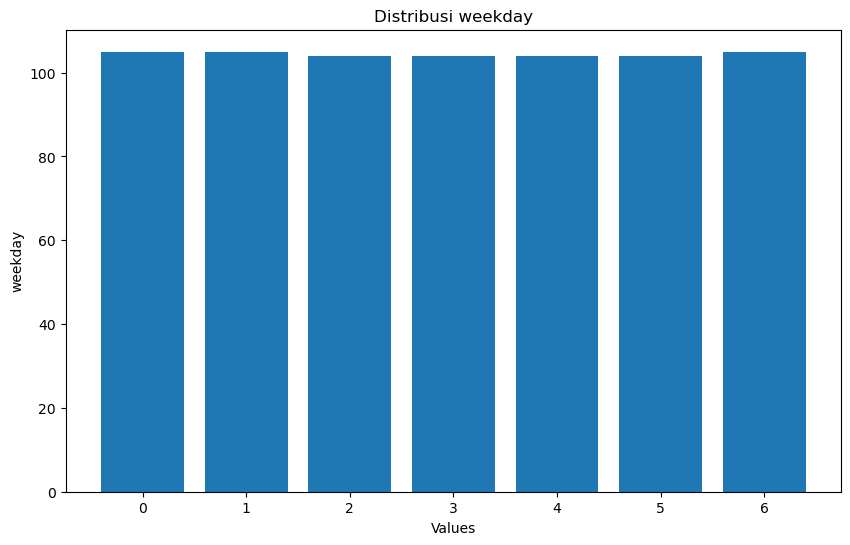

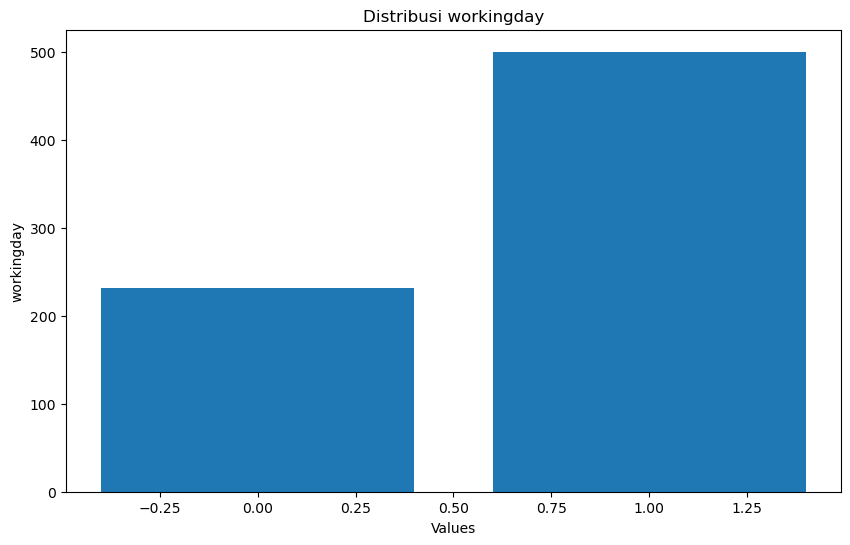

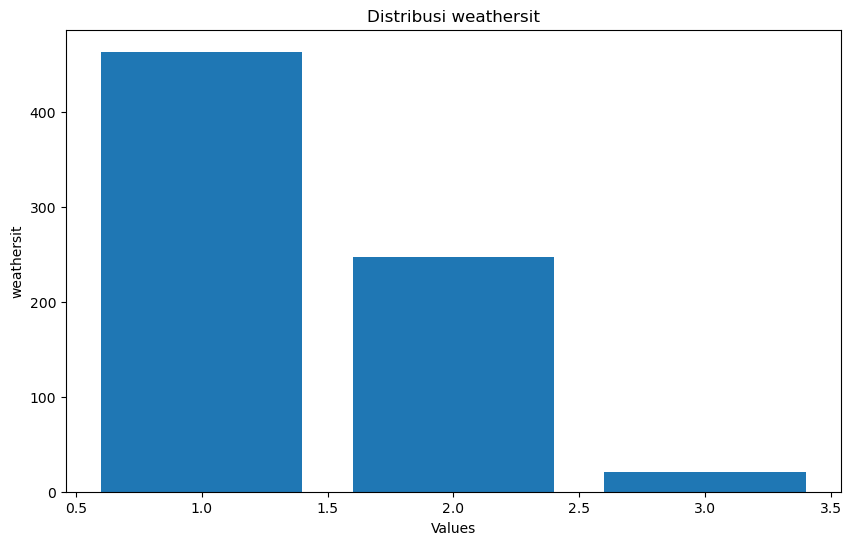

In [54]:
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical:
    value_counts = day[col].value_counts()

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Values')
    plt.ylabel(col)

    plt.show()

#### Cek korelasi data terhadap musim (season)

In [55]:
# mengambil kolom yang berkaitan dengan peminjaman terhadap tiap musim-nya 
# terdapat 2 kolom yang kita pakai casual (pengguna yang tidak berlangganan), dan registered (pengguna yang berlangganan)

by_season = day.iloc[:,[2,13,14,15]]
by_season

,season,casual,registered,cnt
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [56]:
# merubah isi kolom season, agar lebih mudah dalam membaca (sesuai dengan 'readme' yang diberikan)
# season : season (1:springer, 2:summer, 3:fall, 4:winter)

season_str = ['springer', 'summer', 'fall', 'winter']
by_season.loc[:, 'season'] = by_season['season'].replace([1,2,3,4], season_str)
by_season

,season,casual,registered,cnt
0,springer,331,654,985
1,springer,131,670,801
2,springer,120,1229,1349
3,springer,108,1454,1562
4,springer,82,1518,1600
...,...,...,...,...
726,springer,247,1867,2114
727,springer,644,2451,3095
728,springer,159,1182,1341
729,springer,364,1432,1796


In [57]:
# Pengelompokkan untuk mengetahui jumlah total penyewa sepeda tiap musimnya

by_season.groupby(by='season').sum().sort_values(ascending=False, by='cnt')

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
springer,60622,410726,471348


#### Cek korelasi data terhadap hari (weekday, workingday, holiday)

In [58]:
by_day = day.iloc[:, [5,6,7,15]]
by_day

,holiday,weekday,workingday,cnt
0,0,6,0,985
1,0,0,0,801
2,0,1,1,1349
3,0,2,1,1562
4,0,3,1,1600
...,...,...,...,...
726,0,4,1,2114
727,0,5,1,3095
728,0,6,0,1341
729,0,0,0,1796


##### Weekday

c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


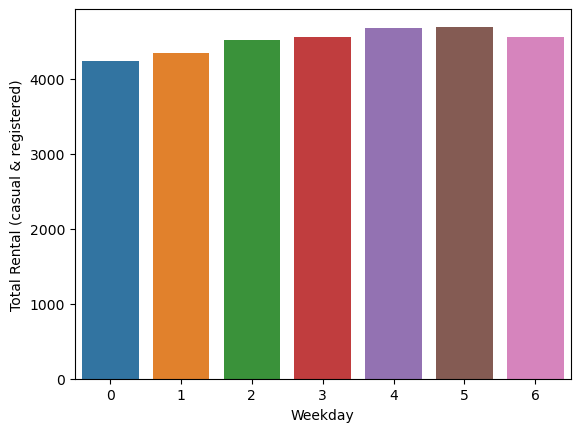

In [88]:
sns.barplot(data=by_day, x='weekday', y='cnt', errorbar=None)
plt.ylabel('Total Rental (casual & registered)')
plt.xlabel('Weekday')
plt.show()

Data tersebut menunjukkan total peminjaman sepeda pada setiap harinya. Jika dilihat lebih seksama hari ke 4 dan 5 memiliki perbedaan yang tidak terlalu signifikan

In [76]:
by_day.groupby(by='weekday').sum().sort_values(ascending=False, by='cnt')

,holiday,workingday,cnt
weekday,,,
5,2,102,487790
4,2,102,485395
6,0,0,477807
3,1,103,473048
2,1,103,469109
1,15,90,455503
0,0,0,444027


##### Holiday

In [61]:
by_day.groupby(by='holiday').sum().sort_values(ascending=False, by='cnt')

,weekday,workingday,cnt
holiday,,,
0,2153,500,3214244
1,38,0,78435


c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


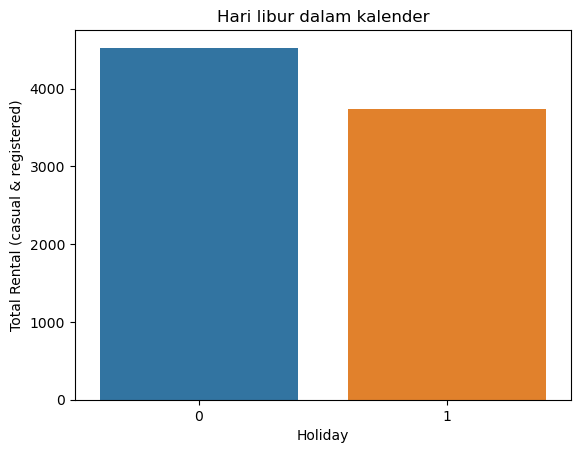

In [62]:
sns.barplot(data=by_day, x='holiday', y='cnt', errorbar=None)
plt.ylabel('Total Rental (casual & registered)')
plt.xlabel('Holiday')
plt.title('Hari libur dalam kalender')
plt.show()

##### Workingday

In [63]:
by_day.groupby(by='workingday').sum().sort_values(ascending=False, by='cnt')

,holiday,weekday,cnt
workingday,,,
1,0,1523,2292410
0,21,668,1000269


c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


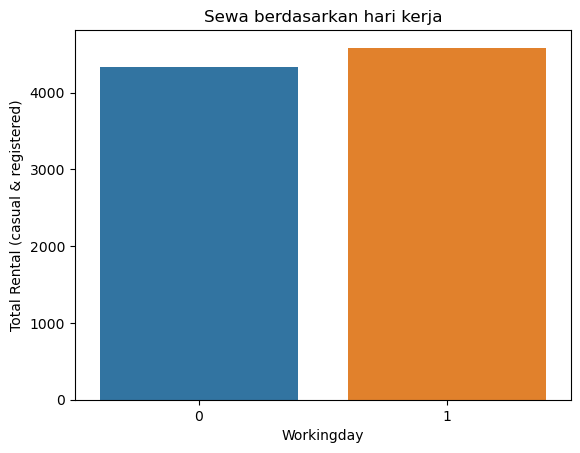

In [64]:
sns.barplot(data=by_day, x='workingday', y='cnt', errorbar=None)
plt.ylabel('Total Rental (casual & registered)')
plt.xlabel('Workingday')
plt.title('Sewa berdasarkan hari kerja')
plt.show()

Menunjukkan bahwasannya sewa sepeda pada hari kerja (1) lebih tinggi

#### Cek korelasi data bulan terhadap liburan (holiday)

In [65]:
# by_month = day.iloc[:, [4,5,9,15]]
by_month = day.iloc[:, [4,5, 15]]
by_month

,mnth,holiday,cnt
0,1,0,985
1,1,0,801
2,1,0,1349
3,1,0,1562
4,1,0,1600
...,...,...,...
726,12,0,2114
727,12,0,3095
728,12,0,1341
729,12,0,1796


In [66]:
by_month.groupby(by='mnth').sum().sort_values(ascending=False, by='holiday')

,holiday,cnt
mnth,,
11,4,254831
1,3,134933
2,2,151352
4,2,269094
5,2,331686
7,2,344948
9,2,345991
10,2,322352
12,2,211036


In [67]:
merged_data = pd.merge(by_season, by_day, on='cnt', how='inner')
merged_data = pd.merge(merged_data, by_month, on='cnt', how='inner')

merged_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang mempengaruhi dalam peminjaman sepeda ?

c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


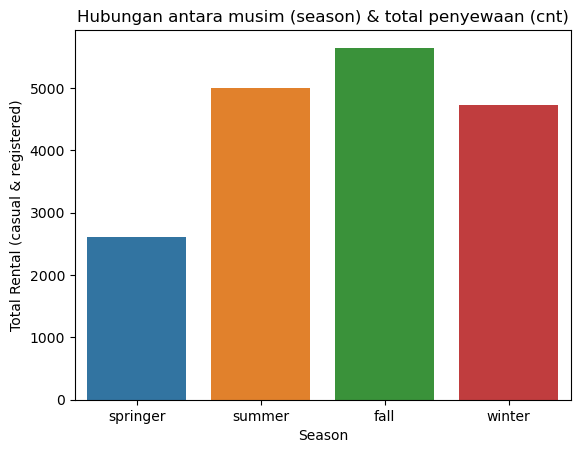

In [68]:
sns.barplot(data=by_season, x='season', y='cnt', errorbar=None)
plt.ylabel('Total Rental (casual & registered)')
plt.xlabel('Season')
plt.title('Hubungan antara musim (season) & total penyewaan (cnt)')
plt.show()

Musim yang paling banyak orang menyewa sepeda adalah fall / gugur / autumn hal ini wajar dikarenakan pada musim tersebut kondisi cuaca sangat mendukung untuk melakukan aktivitas diluar ruangan

c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

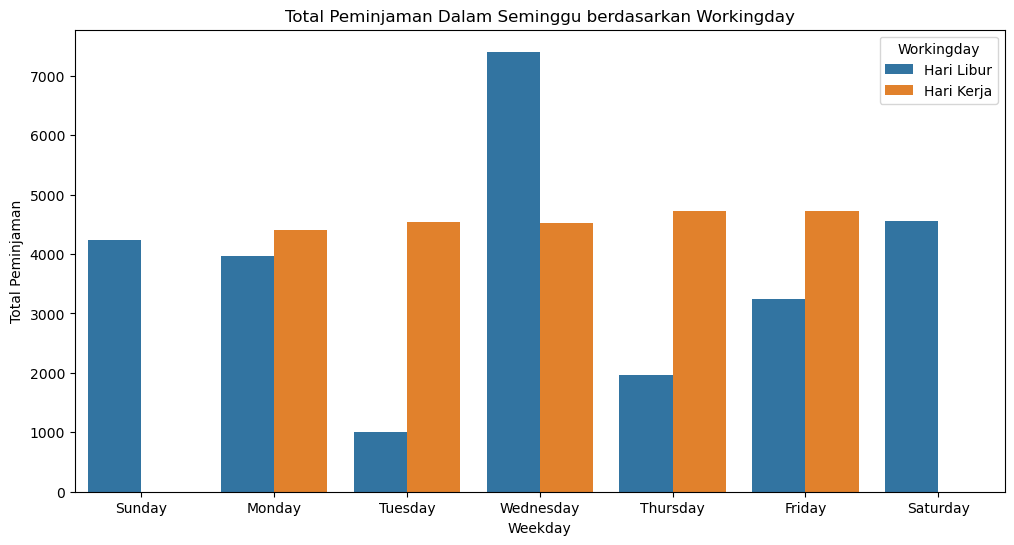

In [69]:
# menyiapkan parameter 'weekday'
weekday_str = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='weekday',
    y='cnt',
    hue=by_day['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur'),
    data=by_day,
    errorbar=None
)

plt.title('Total Peminjaman Dalam Seminggu berdasarkan Workingday')
plt.xlabel('Weekday')
plt.ylabel('Total Peminjaman')
bar_plot.legend(loc='upper right', title='Workingday')
plt.xticks(ticks=range(len(weekday_str)), labels=weekday_str)
plt.show()

Pada plot tersebut terlihat total peminjaman sepeda selama satu minggu terhadap hari kerja selalu berubah-ubah. Jika dalam satu minggu tersebut adalah hari kerja maka haru Rabu dan Kamis adalah yang paling tinggi tingkat sewanya, sementara jika pada satu minggu hari tersebut adalah hari libur maka hari Rabu adalah yang paling tinggi

c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

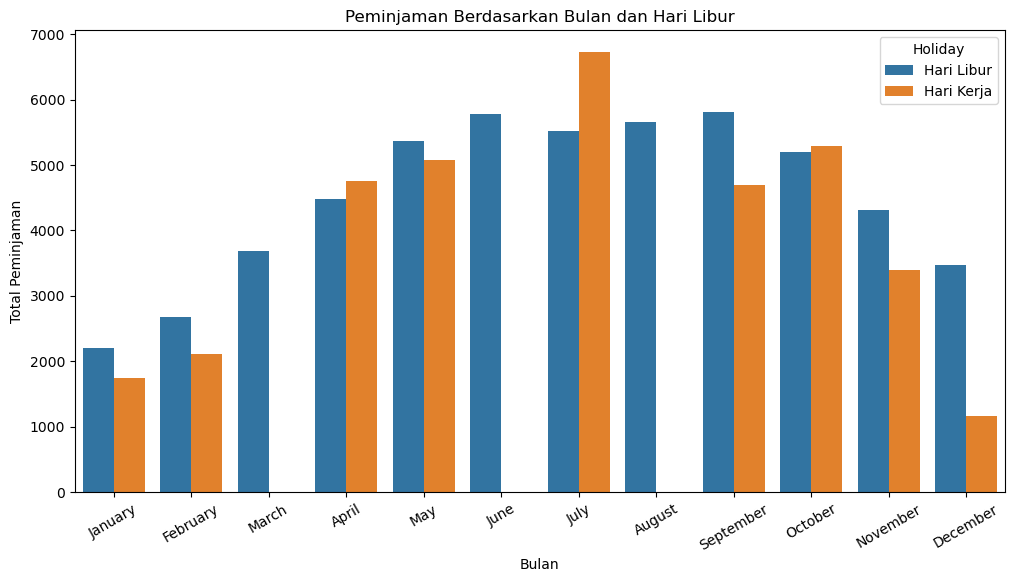

In [70]:
# menyiapkan parameter 'month'
month_str = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='mnth',
    y='cnt',
    hue=by_month['holiday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur'),
    data=by_month,
    errorbar=None
)

plt.title('Peminjaman Berdasarkan Bulan dan Hari Libur')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
bar_plot.legend(loc='upper right', title='Holiday')
plt.xticks(ticks=range(len(month_str)), labels=month_str, rotation=30)
plt.show()

Plot diatas menjelaskan adanya hubungan dari hari libur dengan bulan. Dimana ada beberapa musim yang berlangsung seperti
* Fall (Sept - Nov)
* Winter (Dec - Jan)
* Summer (March - Mei)
* Springer (June - Aug)

Sehingga dapat dijelaskan kenapa pada bulan Maret lebih banyak libur, karena ada kemungkinan wisatawan asing yang lebih memilih liburan dan menyewa sepeda

Sementara itu pada bulan Juli pengguna sepeda pada hari kerja bisa dibilang tinggi karena pada bulan tersebut terjadi musim panas dan biasanya pekerjaan akan dioptimalkan di bulan-bulan tersebut 

### Pertanyaan 2: Cara meningkatkan efisiensi pengelolaan peminjaman agar bisa menghadapi permintaan yang tinggi ?

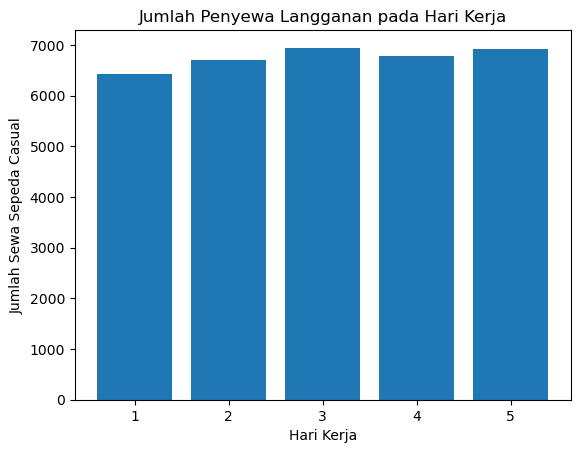

In [71]:
# Filter data
filtered_data = day[(day["workingday"] == 1) & (day["registered"] > 0)]

plt.bar(filtered_data["weekday"], filtered_data["registered"])

plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Sewa Sepeda Casual')
plt.title('Jumlah Penyewa Langganan pada Hari Kerja')

plt.show()

Pada bagian ini terlihat bahwa, jumlah penyewa tetap/berlangganan tidak mengalami perubahan yang berarti pada hari kerja yang berarti semua penyewa tetap masih menggunakan jasa tersebut

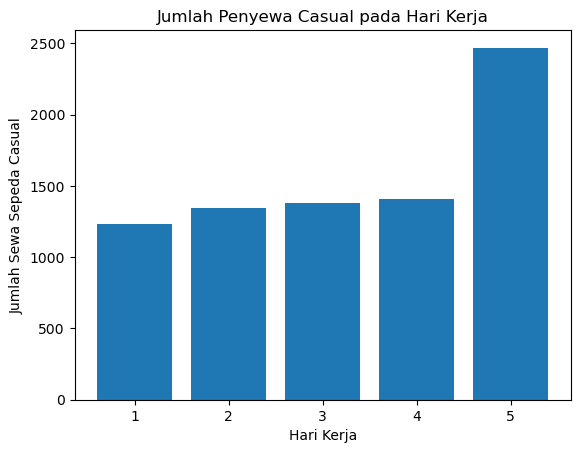

In [72]:
# Filter data
filtered_data = day[(day["workingday"] == 1) & (day["casual"] > 0)]

plt.bar(filtered_data["weekday"], filtered_data["casual"])

plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Sewa Sepeda Casual')
plt.title('Jumlah Penyewa Casual pada Hari Kerja')

plt.show()

Pada bagian ini terlihat bahwa penyewa sepeda casual (tidak berlangganan) lebih sering menggunakan layanan ini pada hari ke 5 (Jumat) sementara hari lain sedikit. Ini sesuai dengan plot bar sebelumnya yang memberikan informasi bahwa pada semua hari kerja, para `penyewa tetap` masih menggunakan layanan tersebut. Ada kemungkinan para penyewa casual tidak menyewa pada hari selain Jumat dikarenakan stok sepeda sudah dipakai semua.

Saran:
* Mempertimbangkan untuk meningkatkan jumlah stok sepeda, sehingga pengguna casual juga bisa meminjam dihari selain Jumat
* Promosi khusus `pengguna casual` pada hari kerja

### Pertanyaan 3: Berapa jumlah sepeda yang disewa (perjam) selama hari libur tahun 2012

In [89]:
# cek kejadian sewa sepeda saat kiamat 2012
# Filter data tahun 2012 (yr = 1), Liburan (holiday = 1), dan musim dingin/winter (season 4)

filtered_data = hour[(hour["yr"] == 1) & (hour["holiday"] == 1) & (hour["season"] == 4)]

# Hitung distribusi per jam sewa sepeda (cnt)
distribusi_per_jam = filtered_data.groupby("hr")["cnt"].sum()

print("Distribusi per jam sewa sepeda pada Hari Libur tahun 2012:")
print(distribusi_per_jam)

Distribusi per jam sewa sepeda pada Hari Libur tahun 2012:
hr
0      146
1      109
2       53
3       20
4       14
5       51
6      147
7      474
8     1034
9      848
10     783
11     907
12    1022
13    1094
14    1084
15     980
16     993
17    1202
18    1077
19     768
20     583
21     352
22     263
23     168
Name: cnt, dtype: int64


Peningkatan jumlah sepeda mulai terjadi pada pukul 6:00  dan puncaknya ada pada pukul 17:00 ini menunjukkan bahwa pada jam tersebut banyak masyarakat yang memilih untuk menikmati liburan pada jam tersebut

## Conclusion

#### Kesimpulan pertanyaan 1
- Berdasarkan data yang telah dicoba, untuk variabel yang mempengaruhi peminjaman sepeda adalah hari dimana orang sedang liburan (`mnth`, `holiday`, `workingday`) dimana ketika liburan orang lebih banyak beraktifitas diluar ruangan
#### Kesimpulan pertanyaan 2
- Jumlah penyewa tetap tidak mengalami perubahan yang berarti pada hari kerja, menunjukkan bahwa mereka tetap setia menggunakan layanan penyewaan sepeda. Hal ini dapat dianggap sebagai aspek positif karena menandakan kestabilan pelanggan tetap pada hari-hari kerja.
- Terlihat bahwa penyewa casual (non-langganan) lebih cenderung menggunakan layanan pada hari Jumat, sementara pada hari-hari lain aktivitas mereka cenderung lebih rendah. Hal ini dapat diartikan bahwa pada hari-hari tertentu, stok sepeda mungkin sudah habis karena digunakan oleh penyewa tetap
#### Kesimpulan pertanyaan 3
- Peningkatan jumlah sewa sepeda sering terjadi pada saat liburan